In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from math import exp , pi
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = analytics.read_csv('../data/Data1.csv')
df_raw = df_raw.drop('Unnamed: 0',axis=1)
df_raw = df_raw.rename(columns = {"0":'x',"1":'y'})
df_raw

,x,y
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


<Axes: xlabel='x', ylabel='y'>

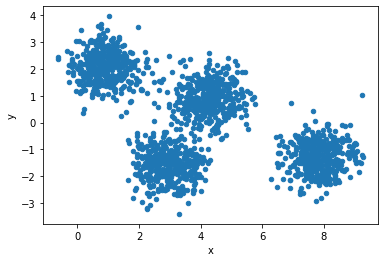

In [3]:
df_raw.plot('x','y',kind = 'scatter')

In [4]:
number_of_clusters = 4
number_of_datapoints = df_raw.shape[0]
number_of_attributes = df_raw.shape[1]

In [5]:
max_loops = 100

In [6]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)

In [7]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)

[[[0.39699548]
  [0.80874491]]

 [[0.10713447]
  [0.92205901]]

 [[0.3299732 ]
  [0.40993413]]

 [[0.91679475]
  [0.03583353]]]
===
[[[0.21915795 0.37727885]
  [0.63079845 0.11888865]]

 [[0.94105594 0.90681251]
  [0.76653699 0.64507667]]

 [[0.38576093 0.18531662]
  [0.90879326 0.71612999]]

 [[0.86094338 0.7709545 ]
  [0.81960817 0.0165742 ]]]
===
[0.00891142 0.26959035 0.42348538 0.29801285]


In [8]:
means[0][0]

array([0.39699548])

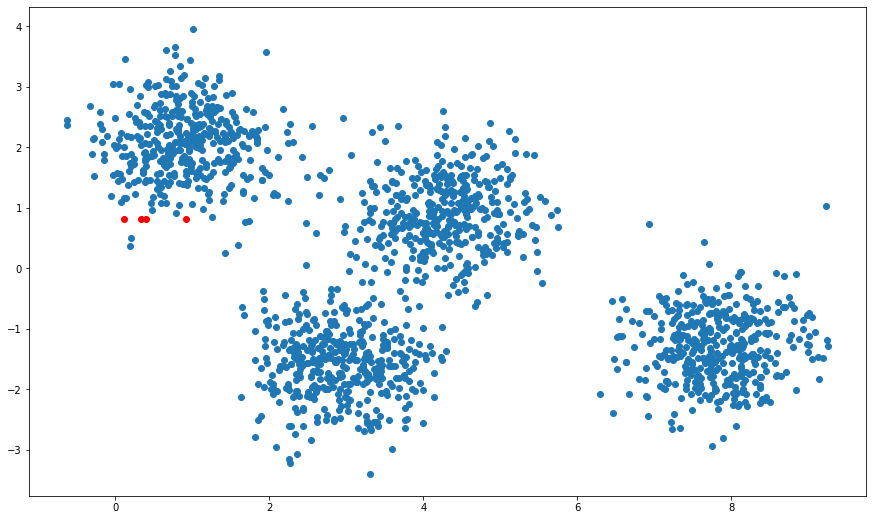

In [9]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[0][1],c = 'red')
graph.scatter(means[2][0],means[0][1],c = 'red')
graph.scatter(means[3][0],means[0][1],c = 'red')

In [10]:
max_loops = 10
for _ in range(max_loops) :
    p_i = []
    for i in range(number_of_clusters):
        mean = means[i]
        sigma = sigmas[i]
        probability = probabilities[i]
        conditional_probabilities = []
        for j in range(number_of_datapoints):
            x = maths.matrix(df_raw.iloc[j]).reshape(-1,1)
            mahalonabis_distance = float((x - mean).T @ sigma @ (x - mean))
            conditional_probability = 1/(sigma * pi ** (number_of_attributes/2)) * exp(-1/2 * mahalonabis_distance)
            conditional_probabilities.append(conditional_probability)
        conditional_probabilities = conditional_probabilities / sum(conditional_probabilities)
        p_i.append(probability*conditional_probabilities)
    for i in range(number_of_clusters):
        probability_sum = sum(p_i[i]) 
        mean_sum = []
        sigma_sum = []
        prob_sum = []
        for j in range(number_of_datapoints):
            x = maths.matrix(df_raw.iloc[j]).reshape(-1,1)
            mean_sum.append(p_i[i][j] / probability_sum * x)
            sigma_sum.append((p_i[i][j] / (probability_sum - 1)) * float((x - means[i]).T @ sigmas[i] @ (x-means[i])) )
        
        probabilities[i] = sum(p_i[i])/number_of_datapoints
        means[i] = sum(mean_sum)
        sigmas[i] = sum(sigma_sum)

ValueError: setting an array element with a sequence.

In [ ]:
sum(p_i[3])
probability_sum

In [ ]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)